## Re-extraer features y RoIs para nuevos experimentos

### Importar datos

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import datetime as dt
import pickle
import numpy as np
import borrador
from __future__ import division
from auxiliar_functions import *
import tfe
from geopy.distance import vincenty
from itertools import chain, combinations
import random
import scipy as sp

In [190]:
reload(tfe)

<module 'tfe' from 'tfe.py'>

In [3]:
datos_abril = pd.read_csv('/home/cata/Documentos/Datois/etapas_2013_abril_allyearsids_10_100000.csv')
datos_abril = frame_config(datos_abril)
datos_septiembre = pd.read_csv('/home/cata/Documentos/Datois/etapas_2013_septiembre_allyearsids_10_100000.csv')
datos_septiembre = frame_config(datos_septiembre)

### Reescribir función getfeatures para obtener features por semana y fds y agregar las que faltan

#### Features seleccionadas:

- time_first_journey_weekday
- time_last_journey_weekday
- time_first_journey_weekend
- time_last_journey_weekend,kmDistance
- kmMaxDist
- kmMinDist
- rg
- unc_entropy
- random_entropy
- percentage_different_first_origin_weekday
- percentage_different_last_origin_weekday
- percentage_different_first_origin_weekend
- percentage_different_last_origin_weekend,card_type
- shortest_activity_length_weekday,longest_activity_length_weekday
- shortest_activity_length_weekend,longest_activity_length_weekdend
- traveled_days,traveled_days_bs
- p100_exclusive_bus_days
- p100_exclusive_metro_days
- P100_bus_trips
- mode_n_trips
- frequence_regularity
- mean_trips_weekdays
- mean_trips_weekend
- most_frequent_number_of_stages


#### Extraer Features Abril

In [179]:
gb = datos_abril.groupby('id')    
df_slices_abril = [gb.get_group(x) for x in gb.groups]
len(df_slices_abril)

5169

In [53]:
the_vectors_abril = []
for df_slice in df_slices_abril:
    the_vectors_abril.append(tfe.general_feature_extraction(df_slice))

#### Extraer Features Septiembre

In [180]:
gb = datos_septiembre.groupby('id')    
df_slices_sept = [gb.get_group(x) for x in gb.groups]
len(df_slices_sept)

5344

In [58]:
the_vectors_sept = []
for df_slice in df_slices_sept:
    the_vectors_sep.append(tfe.general_feature_extraction(df_slice))

#### Guardar Features Abril y Septiembre

In [59]:
with open('complete_features_without_norm_abril_sept.pickle','w') as f:
    pickle.dump(the_vectors_abril,f)
    pickle.dump(the_vectors_sept,f)

In [68]:
df_vector_abril = pd.DataFrame(the_vectors_abril)
df_vector_sept = pd.DataFrame(the_vectors_sept)
df_vector_abril.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5169 entries, 0 to 5168
Data columns (total 29 columns):
0     5160 non-null float64
1     5158 non-null float64
2     3203 non-null float64
3     3197 non-null float64
4     5169 non-null float64
5     5169 non-null float64
6     5169 non-null float64
7     5169 non-null float64
8     5169 non-null float64
9     5169 non-null float64
10    5158 non-null float64
11    5160 non-null float64
12    3186 non-null float64
13    3200 non-null float64
14    5169 non-null int64
15    5159 non-null float64
16    5159 non-null float64
17    3078 non-null float64
18    3078 non-null float64
19    5169 non-null int64
20    5169 non-null int64
21    5169 non-null float64
22    5169 non-null float64
23    5169 non-null float64
24    5065 non-null float64
25    5169 non-null int64
26    5169 non-null float64
27    5169 non-null float64
28    5168 non-null float64
dtypes: float64(25), int64(4)
memory usage: 1.1 MB


In [70]:
df_vector_abril.to_csv('features_abril_without_norm.csv')
df_vector_sept.to_csv('features_sept_without_norm.csv')

#### Leer Features

In [168]:
with open('complete_features_without_norm_abril_sept.pickle','r') as f:
    the_vectors_abril = pickle.load(f)
    the_vectors_sept =  pickle.load(f)

#### Normalizar features

#### TODO: me falta revisar en la normalizacion remover outliers

In [170]:
the_vectors_abril = np.asmatrix(the_vectors_abril)
the_vectors_sept = np.asmatrix(the_vectors_sept)

In [171]:
limit = np.min((len(the_vectors_abril),len(the_vectors_sept)))
limit

5169

In [172]:
def normalizar(vector):
    a_max = np.nanmax(vector)
    a_min = np.nanmin(vector)
    for i in range(len(vector)):
        vector[i] = (vector[i] - a_min)/a_max
    return vector 

In [173]:
for i in range(the_vectors_abril.shape[1]):
    the_vectors_abril[:,i] = normalizar(the_vectors_abril[:,i])
for i in range(the_vectors_sept.shape[1]):
    the_vectors_sept[:,i] = normalizar(the_vectors_sept[:,i])

In [178]:
a_matrix = np.zeros((limit, limit)) 
init_time = time.time()
for i in range(limit):
    for j in range(limit):
        dist = np.linalg.norm(np.asarray(the_vectors_abril[i])-np.asarray(the_vectors_sept[j]))
        a_matrix[i,j] = dist
delta_time = time.time()-init_time
print delta_time

760.583767891


In [183]:
asda = pd.DataFrame(a_matrix)

In [189]:
pd.DataFrame(the_vectors_abril).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5169 entries, 0 to 5168
Data columns (total 29 columns):
0     5160 non-null float64
1     5158 non-null float64
2     3203 non-null float64
3     3197 non-null float64
4     5169 non-null float64
5     5169 non-null float64
6     5169 non-null float64
7     5169 non-null float64
8     5169 non-null float64
9     5169 non-null float64
10    5158 non-null float64
11    5160 non-null float64
12    3186 non-null float64
13    3200 non-null float64
14    5169 non-null float64
15    5159 non-null float64
16    5159 non-null float64
17    3078 non-null float64
18    3078 non-null float64
19    5169 non-null float64
20    5169 non-null float64
21    5169 non-null float64
22    5169 non-null float64
23    5169 non-null float64
24    5065 non-null float64
25    5169 non-null float64
26    5169 non-null float64
27    5169 non-null float64
28    5168 non-null float64
dtypes: float64(29)
memory usage: 1.1 MB


### Extraer Todos los RoIs de todos

#### Extraer RoIs abril

In [191]:
abril_rois = []
init_time = time.time()
for df_slice in df_slices_abril:
    rois = tfe.get_ROIs(df_slice,1,500)
    abril_rois.append(rois)
delta_time = time.time()-init_time
print delta_time

26.3120808601


#### Extraer RoIs septiembre

In [192]:
septiembre_rois = []
init_time = time.time()
for df_slice in df_slices_abril:
    rois = tfe.get_ROIs(df_slice,1,500)
    septiembre_rois.append(rois)
delta_time = time.time()-init_time
print delta_time
    

26.6662940979


#### Guardar RoIs

In [195]:
with open('rois_meters_data.pickle', 'w') as f:
    pickle.dump(abril_rois, f)
    pickle.dump(septiembre_rois, f)

#### Leer RoIs

In [ ]:
with open('data/rois_meters_data.pickle', 'r') as f:
    abril_rois = pickle.load(f)
    septiembre_rois = pickle.load(f)

#### Graficos

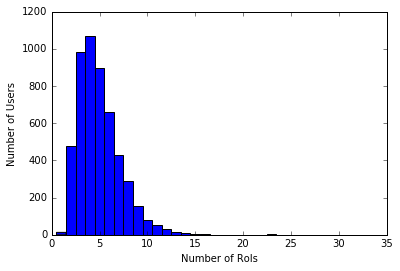

In [196]:
n_of_rois = [len(rois[0]) for rois in abril_rois]
d = np.diff(np.unique(n_of_rois)).min()
left_of_first_bin = min(n_of_rois) - float(d)/2
right_of_last_bin = max(n_of_rois) + float(d)/2
plt.hist(n_of_rois, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.xlabel('Number of RoIs')
plt.ylabel('Number of Users')
plt.savefig('n_rois_meters_abril.eps', format='eps', dpi=1000)

#### Extraer RoIs compartidos

In [199]:
#Función que identifica cuantos rois comparten dos grupos de rois y cual es la minima distancia que se descarta como
#rois compartidos
#share_rois: list(dict) list(dict) -> [int,int]
def share_rois(rois_a,rois_b):
    shared = 0
    rois = [rois_a,rois_b]
    index = np.argmin([len(rois_a),len(rois_b)])
    other_index = abs(index-1)
    min_distance = -1
    for i in range(len(rois[index])):
        an_a_roi = rois[index][i]
        lat_a_roi = an_a_roi['lat']
        long_a_roi = an_a_roi['long']
        for j in range(len(rois[other_index])):
            an_b_roi = rois[other_index][j]
            lat_b_roi = an_b_roi['lat']
            long_b_roi = an_b_roi['long']
            a_distance = vincenty((lat_a_roi,long_a_roi),(lat_b_roi,long_b_roi)).meters
            if a_distance < 500:
                shared +=1
            elif min_distance == -1 or min_distance > a_distance:
                min_distance = a_distance
    return [shared,min_distance]

In [200]:
#Función que identifica cuantos rois comparten cada par de rois de dos cortes temporales (ct)
#get_shared_rois: list(list(dict)) list(list(dict)) -> [[int]] list(int)
def get_shared_rois(rois_ct1,rois_ct2,limit):
    init_time = time.time()
    shared = np.ones((limit, limit)) * -1
    min_distance = []
    min_distance_not_shared = -1
    for i in range(limit):
        rois_i = rois_ct1[i]
        for j in range(limit):
            rois_j = rois_ct2[j]
            share_RoIs,min_distance_not_shared = share_rois(rois_i[0],rois_j[0])
            if i==j:
                min_distance.append(min_distance_not_shared)
                min_distance_not_shared = -1
            shared[i,j] = share_RoIs
    delta_time = time.time() - init_time
    print delta_time
    return [shared,min_distance]

In [ ]:
shared_rois,min_distance = get_shared_rois(abril_rois,septiembre_rois,limit)

#### Guardar Shared Rois

In [ ]:
with open('shared_all_rois.pickle', 'w') as f:
    pickle.dump(shared_rois,f)